In [19]:
!pip install mecab-python3
!pip install unidic-lite

In [20]:
import matplotlib.pyplot as plt
import MeCab

In [24]:
def find_tokens(text, keywords=None):
    if keywords is None: keywords = []
    mt = MeCab.Tagger('-r /dev/null /usr/local/lib/mecab/dic/mydic')
    mt.parse('')
    parsed = mt.parseToNode(text)
    components = []
    while parsed:
        if parsed.surface != '' and parsed.feature.split(',')[0] != "記号":
            components.append((parsed.surface, parsed.feature.split(',')[0]))
        parsed = parsed.next
    for a_keyword in keywords:
        cindex = 0
        while True:
            if cindex >= len(components):
                break
            temp_key = a_keyword
            if components[cindex][0] == temp_key:
                cindex += 1
                continue
            elif components[cindex][0] == temp_key[:len(components[cindex][0])]:
                match = False
                temp_index = cindex
                temp_key = temp_key.replace(components[temp_index][0], '', 1)
                while True:
                    temp_index += 1
                    if temp_index >= len(components):
                        break
                    else:
                        if components[temp_index][0] == temp_key[:len(components[temp_index][0])]:
                            temp_key = temp_key.replace(components[temp_index][0], '', 1)
                            if temp_key == '':
                                match = True
                                break
                            else:
                                continue
                        else:
                            break
                if match:
                    components[cindex] = (a_keyword, 'PROJECT_KEYWORD')
                    del components[cindex+1:temp_index+1]
                cindex += 1
                continue
            else:
                cindex += 1
                continue

    return components

In [25]:
def analyze(text):
    res = find_tokens(text)
    return res

In [26]:
import time

lens = [25, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
times = []


for x in lens:
    t = 0
    for k in range(5):
        fname = 'texts/' + str(x) + '_' + str(k%5)
        with open(fname, 'r', encoding='utf-8') as f:
            text = f.read()
            ts = time.time_ns()
            res = analyze(text)
            dt = time.time_ns() - ts
            t += dt / 1000000
    t /= 5
    times.append(t)

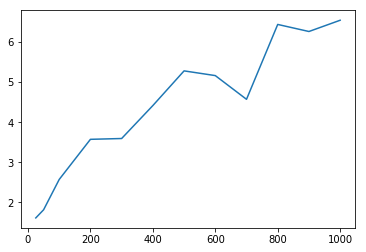

In [27]:
plt.plot(lens, times)